# Rainfall Prediction- Australia 

### 1. We have a dataset that contains the variables Date, Location, MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm,RainToday and RainTomorrow.
### 2. We try to predict the binary dependent variable 'RainTomorrow' by using three algorithms- Logistic Regression, Decision Tree and Random Forest Classifier.
### 3. We will also compare the accuracy and error of these three algorithms.


In [2]:
#importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# loading the dataset into dataframe

df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#displaying the count of entries in the dataset

df.shape

(145460, 23)

In [6]:
#displaying the basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#converting object datatype to binary

df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [8]:
#displaying the first five rows of the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [9]:
#displaying the unique loactions from the dataset

df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [25]:
#displaying the summary statistics of the data

df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,1.454600e+05,145460.000000,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199.000000,142193.000000
mean,1.683993e+09,23.793524,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,0.224193,0.224181
std,7.152582e-07,14.228687,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,0.417051,0.417043
min,1.683993e+09,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000,0.000000
25%,1.683993e+09,11.000000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000,0.000000
50%,1.683993e+09,24.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000,0.000000
75%,1.683993e+09,36.000000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.000000,0.000000
max,1.683993e+09,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,1.000000,1.000000


## Data Pre-processing

In [26]:
#displaying the count of NULL entries in each row

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [27]:
#label encoding the object datatype "Location"

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Location']=le.fit_transform(df.Location.values)

In [28]:
#creating Timestamp for "Date" attribute

from datetime import datetime
dt=datetime.now()
ts=datetime.timestamp(dt)
df['Date']=ts

In [29]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.683995e+09,2,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,1.683995e+09,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,1.683995e+09,2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,1.683995e+09,2,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,1.683995e+09,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [30]:
#replacing the NULL values with mode of the respective column

df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mode()[0])
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mode()[0])
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mode()[0])
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mode()[0])
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mode()[0])
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mode()[0])                                            
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mode()[0])
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mode()[0])
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mode()[0])
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mode()[0])
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mode()[0])
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mode()[0]) 
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mode()[0])
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])

In [31]:
# checking if all the NULL values are removed

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1.683995e+09,2,13.4,22.9,0.6,4.0,0.0,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0.0,0.0
1,1.683995e+09,2,7.4,25.1,0.0,4.0,0.0,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0.0,0.0
2,1.683995e+09,2,12.9,25.7,0.0,4.0,0.0,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0.0,0.0
3,1.683995e+09,2,9.2,28.0,0.0,4.0,0.0,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0.0,0.0
4,1.683995e+09,2,17.5,32.3,1.0,4.0,0.0,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [32]:
#checking for NULL values

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<AxesSubplot: >

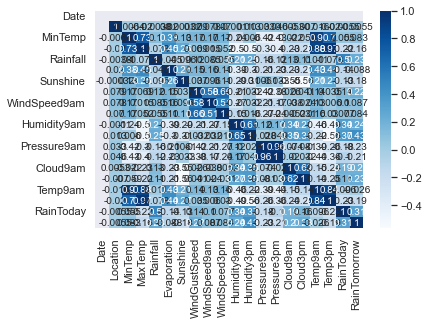

In [33]:
#plotting heatmap to analyze the correlation among the features

sns.set(rc={'figure.figsize':(20,20)})
cormat = pd.DataFrame.corr(df)
sns.heatmap(cormat, annot = True, cmap = "Blues")

In [34]:
#selecting features and the target variable to train the model

features=df[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
target=df['RainTomorrow']

In [35]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [36]:
#normalizing the data using pre-processing from StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model 1- Logistic Regression 

#### Logistic regression is a supervised machine learning algorithm mainly used for classification tasks where the goal is to predict the probability that an instance of belonging to a given class or not. It's a type of statistical technique that examines the correlation between a group of independent variables and a set of binary dependent variables. It is an effective instrument for making decisions.

In [38]:
#importing logistics regression and fitting the training dataset into it

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, solver='lbfgs' )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [39]:
#printing the first 10 entries of the training dataset and y predicted values

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.05532144 -2.63513593 -3.46600633 -0.06132822 -0.26525463 -0.84612731
   1.77797393  1.32588297  2.21633106 -0.1657586   0.00650223  0.61064714
   0.60857364 -3.1228589  -3.47562802  1.88328481]
 [-1.46072457  0.18721412  1.55364526 -0.27973387  1.35598216  1.65209592
   0.10044064 -2.45564573 -2.17306012 -0.64258112 -0.97466998 -2.10622781
  -1.87259463  1.37402513  1.76836915 -0.53098713]
 [-1.2499141  -2.00794703 -1.37682173 -0.25546657 -0.26525463 -0.84612731
  -1.50084114  0.96327063  0.31426155  2.21835399  2.24055585  0.61064714
   0.19504559 -1.60844435 -1.27606254 -0.53098713]
 [ 0.22575918  0.87712191  0.1234652  -0.03706093  0.17123219  0.75529783
  -0.35706844  0.8596671   0.65565864  0.07265266  0.00650223  0.22252215
   0.60857364  0.50864538  0.19517     1.88328481]
 [-0.68775285  0.50080857  0.22161481 -0.25546657 -0.26525463 -0.84612731
  -0.73832601  0.60065829  0.89951371  0.96669488  0.79143999  0.61064714
   0.60857364  0.49319217  0.19517    -0.53098713]
 [ 0.

In [40]:
#printing the first 20 values of the y_test and y_test to compare them

print(y_pred[:20])
print(y_test[:20])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
52690     0.0
136179    0.0
60857     0.0
21558     1.0
92938     0.0
17818     1.0
121179    0.0
113388    0.0
80294     1.0
76427     1.0
139937    0.0
77097     1.0
125225    0.0
41016     0.0
84782     0.0
97319     0.0
142264    0.0
108033    0.0
121123    0.0
95167     0.0
Name: RainTomorrow, dtype: float64


In [41]:
#calculating the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('\nThe Confusion Matrix is as follows:\n', cm)


The Confusion Matrix is as follows:
 [[26791  1555]
 [ 4345  3674]]


In [42]:
#calculating precision
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print("Precision: " ,precision)
#precision=TP/(TP+FP)

#calculating accuracy
total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
accuracy_lr=(cm[0][0]+cm[1][1])/total
print("Accuracy: " ,(accuracy_lr)*100, "%")
#accuracy=(TP+TN)/Total

#calculating error rate
error=(cm[0][1]+cm[1][0])/total
print("Error Rate: " ,error*100, "%")
#error rate=(FP+FN)/Total

#calculating recall
recall=cm[0][0]/(cm[0][0]+cm[1][0])
print("Recall: " ,recall)
#recall=TP/(TP+FN)

Precision:  0.945142171734989
Accuracy:  83.77560841468446 %
Error Rate:  16.22439158531555 %
Recall:  0.8604509249743063


In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# model evaluation for training set

y_train_predict_lr = classifier.predict(X_train)
rmse_lr = (np.sqrt(mean_squared_error(y_train, y_train_predict_lr)))
mse_lr= mean_squared_error(y_train, y_train_predict_lr)
mae_lr= mean_absolute_error(y_train, y_train_predict_lr)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr))
print('MSE is {}'.format(mse_lr))
print('MAE is {}'.format(mae_lr))
print("\n")

# model evaluation for testing set

y_test_predict_lr = classifier.predict(X_test)
rmse_lr = (np.sqrt(mean_squared_error(y_test, y_test_predict_lr)))
mse_lr =(mean_squared_error(y_test, y_test_predict_lr))
mae_lr= mean_absolute_error(y_test, y_test_predict_lr)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_lr))
print('MSE is {}'.format(mse_lr))
print('MAE is {}'.format(mae_lr))

The model performance for training set
--------------------------------------
RMSE is 0.3994014496006207
MSE is 0.15952151794307715
MAE is 0.15952151794307715


The model performance for testing set
--------------------------------------
RMSE is 0.4027951288845925
MSE is 0.1622439158531555
MAE is 0.1622439158531555


In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, y_pred))
print('\nPrecision:', precision_score(y_test, y_pred))


Area Under the Receiver Operating Characteristic Curve: 0.6914817540648869

Precision: 0.5170320822494735


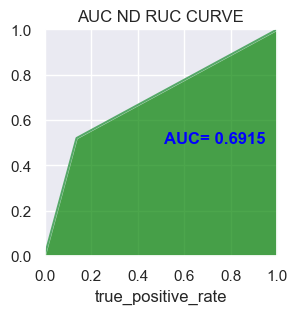

In [55]:
#calculate AUC of model

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds= metrics.roc_curve(y_test,y_pred)

plt.figure(figsize=(3,3),dpi=100)

plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC ND RUC CURVE")
plt.plot(false_positive_rate, true_positive_rate,'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor="green", alpha=0.7)
#print(auc)
plt.text(0.95,0.5, "AUC= %0.4F" %auc, ha="right", fontsize=12,weight="bold",color="blue")
plt.xlabel("false_positive_rate")
plt.xlabel("true_positive_rate")
plt.show()

## Model 2-Decision Tree

#### A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

In [56]:
#creating a decision tree model 

from sklearn.tree import DecisionTreeClassifier

clf=DecisionTreeClassifier(criterion='entropy',random_state=0)
clf=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [57]:
#printing the first 10 entries of the training dataset and y predicted values

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.05532144 -2.63513593 -3.46600633 -0.06132822 -0.26525463 -0.84612731
   1.77797393  1.32588297  2.21633106 -0.1657586   0.00650223  0.61064714
   0.60857364 -3.1228589  -3.47562802  1.88328481]
 [-1.46072457  0.18721412  1.55364526 -0.27973387  1.35598216  1.65209592
   0.10044064 -2.45564573 -2.17306012 -0.64258112 -0.97466998 -2.10622781
  -1.87259463  1.37402513  1.76836915 -0.53098713]
 [-1.2499141  -2.00794703 -1.37682173 -0.25546657 -0.26525463 -0.84612731
  -1.50084114  0.96327063  0.31426155  2.21835399  2.24055585  0.61064714
   0.19504559 -1.60844435 -1.27606254 -0.53098713]
 [ 0.22575918  0.87712191  0.1234652  -0.03706093  0.17123219  0.75529783
  -0.35706844  0.8596671   0.65565864  0.07265266  0.00650223  0.22252215
   0.60857364  0.50864538  0.19517     1.88328481]
 [-0.68775285  0.50080857  0.22161481 -0.25546657 -0.26525463 -0.84612731
  -0.73832601  0.60065829  0.89951371  0.96669488  0.79143999  0.61064714
   0.60857364  0.49319217  0.19517    -0.53098713]
 [ 0.

In [58]:
#printing the first 20 values of the y_test and y_test to compare them

print(y_pred[:20])
print(y_test[:20])

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
52690     0.0
136179    0.0
60857     0.0
21558     1.0
92938     0.0
17818     1.0
121179    0.0
113388    0.0
80294     1.0
76427     1.0
139937    0.0
77097     1.0
125225    0.0
41016     0.0
84782     0.0
97319     0.0
142264    0.0
108033    0.0
121123    0.0
95167     0.0
Name: RainTomorrow, dtype: float64


In [59]:
#calculating the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('\nThe Confusion Matrix is as follows:\n', cm)


The Confusion Matrix is as follows:
 [[24447  3899]
 [ 3845  4174]]


In [60]:
#calculating precision
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print("Precision: " ,precision)
#precision=TP/(TP+FP)

#calculating accuracy
total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
accuracy_dt=(cm[0][0]+cm[1][1])/total
print("Accuracy: " ,(accuracy_dt)*100, "%")
#accuracy=(TP+TN)/Total

#calculating error rate
error=(cm[0][1]+cm[1][0])/total
print("Error Rate: " ,error*100, "%")
#error rate=(FP+FN)/Total

#calculating recall
recall=cm[0][0]/(cm[0][0]+cm[1][0])
print("Recall: " ,recall)
#recall=TP/(TP+FN)

Precision:  0.8624497283567346
Accuracy:  78.70479857005363 %
Error Rate:  21.295201429946378 %
Recall:  0.8640958574862152


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# model evaluation for training set

y_train_predict_dt = clf.predict(X_train)
rmse_dt = (np.sqrt(mean_squared_error(y_train, y_train_predict_dt)))
mse_dt= mean_squared_error(y_train, y_train_predict_dt)
mae_dt= mean_absolute_error(y_train, y_train_predict_dt)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_dt))
print('MSE is {}'.format(mse_dt))
print('MAE is {}'.format(mae_dt))
print("\n")

# model evaluation for testing set

y_test_predict_dt = clf.predict(X_test)
rmse_dt = (np.sqrt(mean_squared_error(y_test, y_test_predict_dt)))
mse_dt =(mean_squared_error(y_test, y_test_predict_dt))
mae_dt= mean_absolute_error(y_test, y_test_predict_dt)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_dt))
print('MSE is {}'.format(mse_dt))
print('MAE is {}'.format(mae_dt))

The model performance for training set
--------------------------------------
RMSE is 0.008010259702837209
MSE is 6.416426050689766e-05
MAE is 6.416426050689766e-05


The model performance for testing set
--------------------------------------
RMSE is 0.4614672407652181
MSE is 0.21295201429946378
MAE is 0.21295201429946378


In [62]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, y_pred))
print('\nPrecision:', precision_score(y_test, y_pred))


Area Under the Receiver Operating Characteristic Curve: 0.6914817540648869

Precision: 0.5170320822494735


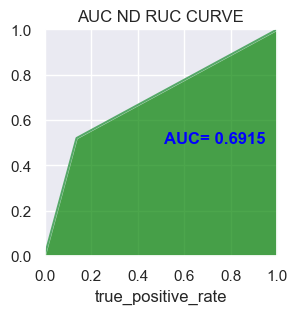

In [63]:
#calculate AUC of model

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds= metrics.roc_curve(y_test,y_pred)

plt.figure(figsize=(3,3),dpi=100)

plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC ND RUC CURVE")
plt.plot(false_positive_rate, true_positive_rate,'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor="green", alpha=0.7)
#print(auc)
plt.text(0.95,0.5, "AUC= %0.4F" %auc, ha="right", fontsize=12,weight="bold",color="blue")
plt.xlabel("false_positive_rate")
plt.xlabel("true_positive_rate")
plt.show()

## Model 3- Random Forest Classifier

#### The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [64]:
#creating a random forest classifier model

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')
rfc=rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)

In [65]:
#printing the first 10 entries of the training dataset and y predicted values

print(X_test[:10])
print('-'*15)
print(y_pred[:10])

[[-0.05532144 -2.63513593 -3.46600633 -0.06132822 -0.26525463 -0.84612731
   1.77797393  1.32588297  2.21633106 -0.1657586   0.00650223  0.61064714
   0.60857364 -3.1228589  -3.47562802  1.88328481]
 [-1.46072457  0.18721412  1.55364526 -0.27973387  1.35598216  1.65209592
   0.10044064 -2.45564573 -2.17306012 -0.64258112 -0.97466998 -2.10622781
  -1.87259463  1.37402513  1.76836915 -0.53098713]
 [-1.2499141  -2.00794703 -1.37682173 -0.25546657 -0.26525463 -0.84612731
  -1.50084114  0.96327063  0.31426155  2.21835399  2.24055585  0.61064714
   0.19504559 -1.60844435 -1.27606254 -0.53098713]
 [ 0.22575918  0.87712191  0.1234652  -0.03706093  0.17123219  0.75529783
  -0.35706844  0.8596671   0.65565864  0.07265266  0.00650223  0.22252215
   0.60857364  0.50864538  0.19517     1.88328481]
 [-0.68775285  0.50080857  0.22161481 -0.25546657 -0.26525463 -0.84612731
  -0.73832601  0.60065829  0.89951371  0.96669488  0.79143999  0.61064714
   0.60857364  0.49319217  0.19517    -0.53098713]
 [ 0.

In [66]:
#printing the first 20 values of the y_test and y_test to compare them

print(y_pred[:20])
print(y_test[:20])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
52690     0.0
136179    0.0
60857     0.0
21558     1.0
92938     0.0
17818     1.0
121179    0.0
113388    0.0
80294     1.0
76427     1.0
139937    0.0
77097     1.0
125225    0.0
41016     0.0
84782     0.0
97319     0.0
142264    0.0
108033    0.0
121123    0.0
95167     0.0
Name: RainTomorrow, dtype: float64


In [67]:
#calculating the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('\nThe Confusion Matrix is as follows:\n', cm)


The Confusion Matrix is as follows:
 [[26915  1431]
 [ 4351  3668]]


In [68]:
#calculating precision
precision=cm[0][0]/(cm[0][0]+cm[0][1])
print("Precision: " ,precision)
#precision=TP/(TP+FP)

#calculating accuracy
total=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
accuracy_rf=(cm[0][0]+cm[1][1])/total
print("Accuracy: " ,(accuracy_rf)*100, "%")
#accuracy=(TP+TN)/Total

#calculating error rate
error=(cm[0][1]+cm[1][0])/total
print("Error Rate: " ,error*100, "%")
#error rate=(FP+FN)/Total

#calculating recall
recall=cm[0][0]/(cm[0][0]+cm[1][0])
print("Recall: " ,recall)
#recall=TP/(TP+FN)

Precision:  0.9495166866577295
Accuracy:  84.10009624639076 %
Error Rate:  15.899903753609241 %
Recall:  0.8608392503038444


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# model evaluation for training set

y_train_predict_rf = rfc.predict(X_train)
rmse_rf = (np.sqrt(mean_squared_error(y_train, y_train_predict_rf)))
mse_rf= mean_squared_error(y_train, y_train_predict_rf)
mae_rf= mean_absolute_error(y_train, y_train_predict_rf)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_rf))
print('MSE is {}'.format(mse_rf))
print('MAE is {}'.format(mae_rf))
print("\n")

# model evaluation for testing set

y_test_predict_rf = rfc.predict(X_test)
rmse_rf = (np.sqrt(mean_squared_error(y_test, y_test_predict_rf)))
mse_rf =(mean_squared_error(y_test, y_test_predict_rf))
mae_rf= mean_absolute_error(y_test, y_test_predict_rf)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_rf))
print('MSE is {}'.format(mse_rf))
print('MAE is {}'.format(mae_rf))

The model performance for training set
--------------------------------------
RMSE is 0.11520779314785203
MSE is 0.013272835601998259
MAE is 0.013272835601998259


The model performance for testing set
--------------------------------------
RMSE is 0.3987468338884867
MSE is 0.1589990375360924
MAE is 0.1589990375360924


In [70]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

print('\nArea Under the Receiver Operating Characteristic Curve:', roc_auc_score(y_test, y_pred))
print('\nPrecision:', precision_score(y_test, y_pred))


Area Under the Receiver Operating Characteristic Curve: 0.7034651646282787

Precision: 0.7193567366150225


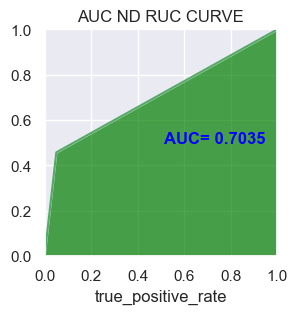

In [71]:
#calculate AUC of model

from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate, true_positive_rate, thresolds= metrics.roc_curve(y_test,y_pred)

plt.figure(figsize=(3,3),dpi=100)

plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC ND RUC CURVE")
plt.plot(false_positive_rate, true_positive_rate,'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor="green", alpha=0.7)
#print(auc)
plt.text(0.95,0.5, "AUC= %0.4F" %auc, ha="right", fontsize=12,weight="bold",color="blue")
plt.xlabel("false_positive_rate")
plt.xlabel("true_positive_rate")
plt.show()

## Summary

In [72]:
# comparing Accuracy of each model by confusion matrix calculation
print('                           Accuracy                              \n')
print('Logistic Regression      Decision Tree        Random Forest Classifier \n')
print(accuracy_lr*100,'%   ',accuracy_dt*100,'%     ',accuracy_rf*100,'%')



                           Accuracy                              

Logistic Regression      Decision Tree        Random Forest Classifier 

83.77560841468446 %    78.70479857005363 %      84.10009624639076 %


In [73]:
# comparing model performance for testing data
print('                                    Errors                                \n')
print('          Logistic Regression      Decision Tree        Random Forest Classifier \n')
print('RMSE     ',        format(rmse_lr),'   ',  format(rmse_dt),'       ',format(rmse_rf),'\n')
print('MSE      ',format(mse_lr),'   ',format(mse_dt),'      ',format(mse_rf),'\n')
print('MAE      ',format(mae_lr),'   ',format(mae_dt),'      ',format(mae_rf),' \n')


                                    Errors                                

          Logistic Regression      Decision Tree        Random Forest Classifier 

RMSE      0.4027951288845925     0.4614672407652181         0.3987468338884867 

MSE       0.1622439158531555     0.21295201429946378        0.1589990375360924 

MAE       0.1622439158531555     0.21295201429946378        0.1589990375360924  



## Conclusion
### 1. We obtain the highest accuracy with the help of Random Forest Classifier i.e. 84.29%.
### 2. The least error (all three types) is found in Random Forest Classifier, thus making it more accurate and precise.